In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('winequality-red.csv',skipinitialspace=True)

In [17]:
wine = data

In [18]:
reviews = []
for i in wine['quality']:
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
wine['Reviews'] = reviews
wine_labels = wine['Reviews'].copy()
wine_set = wine.copy()

In [19]:
from sklearn.model_selection import train_test_split
wine_set.drop(columns=['quality','residual sugar','free sulfur dioxide','pH','Reviews','fixed acidity'], inplace=True)
train_set, test_set, train_labels, test_labels = train_test_split(wine_set,wine_labels,test_size=0.4,random_state=42)



In [20]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler = StandardScaler()
scaler.fit(train_set)
train_set_scaler = scaler.transform(train_set)

In [21]:
scaler.fit(test_set)
test_set_scaler = scaler.transform(test_set)

In [22]:
one_hot = OneHotEncoder()

train_labels_hot = one_hot.fit_transform(train_labels.values.reshape(-1, 1)).todense()
test_labels_hot = one_hot.transform(test_labels.values.reshape(-1, 1)).todense()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [23]:
import mlrose
from sklearn.metrics import accuracy_score

In [65]:
np.random.seed(3)

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_model1.fit(train_set_scaler, train_labels_hot)

In [66]:
train_pred1 = nn_model1.predict(train_set_scaler)
train_accuracy1 = accuracy_score(train_labels_hot, train_pred1)
print(train_accuracy1)

0.4629822732012513


In [67]:
test_pred1 = nn_model1.predict(test_set_scaler)
test_accuracy1 = accuracy_score(test_labels_hot, test_pred1)
print(test_accuracy1)

0.4375


In [32]:
accuracy1_train = []
accuracy1_test = []    
for i in range(4000,28000,2000):

    np.random.seed(3)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

    nn_model1.fit(train_set_scaler, train_labels_hot)
    train_pred1 = nn_model1.predict(train_set_scaler)
    train_accuracy1 = accuracy_score(train_labels_hot, train_pred1)
    accuracy1_train += [train_accuracy1]
    
    nn_model1.fit(test_set_scaler, test_labels_hot)
    test_pred1 = nn_model1.predict(test_set_scaler)
    test_accuracy1 = accuracy_score(test_labels_hot, test_pred1)
    accuracy1_test += [test_accuracy1]

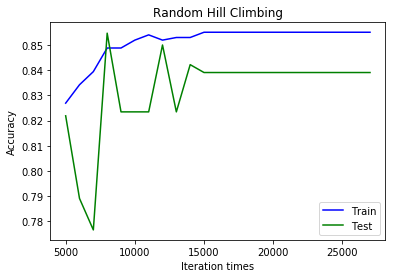

In [26]:
x = range(4000,28000,2000)
plt.title('Random Hill Climbing')
plt.plot(x,accuracy1_train,color= 'b',label='Train')
plt.plot(x,accuracy1_test,color= 'g',label='Test')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Accuracy')
plt.show()

In [349]:
accuracy2_train1 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

    nn_model2.fit(train_set_scaler, train_labels_hot)
    train_pred2 = nn_model2.predict(train_set_scaler)
    train_accuracy2 = accuracy_score(train_labels_hot, train_pred2)
    #print(train_accuracy2)
    accuracy2_train1 += [train_accuracy2]

In [27]:
accuracy2_train2 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'simulated_annealing',schedule=mlrose.GeomDecay(init_temp=5), max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

    nn_model2.fit(train_set_scaler, train_labels_hot)
    train_pred2 = nn_model2.predict(train_set_scaler)
    train_accuracy2 = accuracy_score(train_labels_hot, train_pred2)
    #print(train_accuracy2)
    accuracy2_train2 += [train_accuracy2]

In [351]:
accuracy2_train3 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'simulated_annealing',schedule=mlrose.GeomDecay(init_temp=10), max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

    nn_model2.fit(train_set_scaler, train_labels_hot)
    train_pred2 = nn_model2.predict(train_set_scaler)
    train_accuracy2 = accuracy_score(train_labels_hot, train_pred2)
    #print(train_accuracy2)
    accuracy2_train3 += [train_accuracy2]

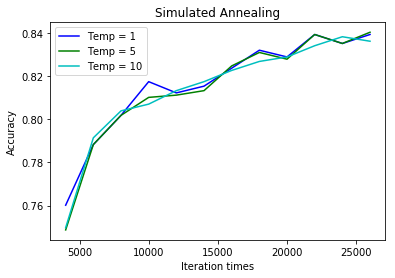

In [352]:
x = range(4000,28000,2000)
plt.title('Simulated Annealing')
plt.plot(x,accuracy2_train1,color= 'b',label='Temp = 1')
plt.plot(x,accuracy2_train2,color= 'g',label='Temp = 5')
plt.plot(x,accuracy2_train3,color= 'c',label='Temp = 10')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Accuracy')
plt.show()

In [36]:
np.random.seed(3)

nn_modelsa = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'simulated_annealing',schedule=mlrose.GeomDecay(init_temp=5), max_iters = 30000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_modelsa.fit(train_set_scaler, train_labels_hot)

In [37]:
train_pred_sa = nn_modelsa.predict(train_set_scaler)
train_accuracy_sa = accuracy_score(train_labels_hot, train_pred_sa)
print(train_accuracy_sa)

0.8435870698644421


In [353]:

accuracy3_train1 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'genetic_alg', pop_size=50 ,max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

    nn_model3.fit(train_set_scaler, train_labels_hot)
    train_pred3 = nn_model3.predict(train_set_scaler)
    train_accuracy3 = accuracy_score(train_labels_hot, train_pred3)
    accuracy3_train1 += [train_accuracy3]

In [358]:
accuracy3_train1

[0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743]

In [354]:

accuracy3_train2 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'genetic_alg',pop_size=100, max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

    nn_model3.fit(train_set_scaler, train_labels_hot)
    train_pred3 = nn_model3.predict(train_set_scaler)
    train_accuracy3 = accuracy_score(train_labels_hot, train_pred3)
    accuracy3_train2 += [train_accuracy3]

In [357]:
 accuracy3_train2

[0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743,
 0.7685088633993743]

In [355]:

accuracy3_train3 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'genetic_alg',pop_size=200, max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

    nn_model3.fit(train_set_scaler, train_labels_hot)
    train_pred3 = nn_model3.predict(train_set_scaler)
    train_accuracy3 = accuracy_score(train_labels_hot, train_pred3)
    accuracy3_train3 += [train_accuracy3]

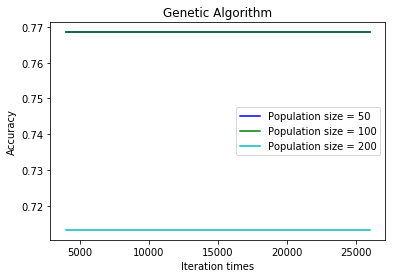

In [356]:
x = range(4000,28000,2000)
plt.title('Genetic Algorithm')
plt.plot(x,accuracy3_train1,color= 'b',label='Population size = 50')
plt.plot(x,accuracy3_train2,color= 'g',label='Population size = 100')
plt.plot(x,accuracy3_train3,color= 'c',label='Population size = 200')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Accuracy')
plt.show()

In [371]:
accuracy3_train4 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'genetic_alg', pop_size=50 ,mutation_prob=0.2 ,max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

    nn_model3.fit(train_set_scaler, train_labels_hot)
    train_pred3 = nn_model3.predict(train_set_scaler)
    train_accuracy3 = accuracy_score(train_labels_hot, train_pred3)
    accuracy3_train4 += [train_accuracy3]

In [28]:
accuracy3_train5 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'genetic_alg', pop_size=50 ,mutation_prob=0.5 ,max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

    nn_model3.fit(train_set_scaler, train_labels_hot)
    train_pred3 = nn_model3.predict(train_set_scaler)
    train_accuracy3 = accuracy_score(train_labels_hot, train_pred3)
    accuracy3_train5 += [train_accuracy3]

In [373]:
accuracy3_train6 = []
for i in range(4000,28000,2000):
    np.random.seed(3)

    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [3], activation = 'relu', \
                                 algorithm = 'genetic_alg', pop_size=50 ,mutation_prob=0.8 ,max_iters = i, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1, max_attempts = 100)

    nn_model3.fit(train_set_scaler, train_labels_hot)
    train_pred3 = nn_model3.predict(train_set_scaler)
    train_accuracy3 = accuracy_score(train_labels_hot, train_pred3)
    accuracy3_train6 += [train_accuracy3]

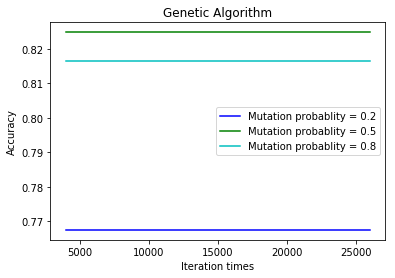

In [374]:
x = range(4000,28000,2000)
plt.title('Genetic Algorithm')
plt.plot(x,accuracy3_train4,color= 'b',label='Mutation probablity = 0.2')
plt.plot(x,accuracy3_train5,color= 'g',label='Mutation probablity = 0.5')
plt.plot(x,accuracy3_train6,color= 'c',label='Mutation probablity = 0.8')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Accuracy')
plt.show()

In [41]:
accuracy3_train5

[0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752,
 0.8248175182481752]

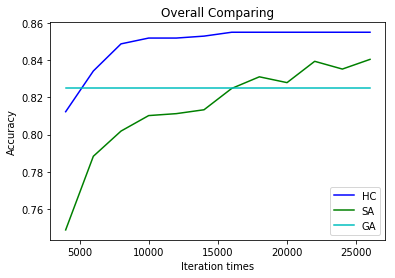

In [33]:
x = range(4000,28000,2000)
plt.title('Overall Comparing')
plt.plot(x,accuracy1_train,color= 'b',label='HC')
plt.plot(x,accuracy2_train2,color= 'g',label='SA')
plt.plot(x,accuracy3_train5,color= 'c',label='GA')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Accuracy')
plt.show()

In [39]:
accuracy1_train

[0.8123044838373306,
 0.8342022940563086,
 0.848800834202294,
 0.8519290928050052,
 0.8519290928050052,
 0.8529718456725756,
 0.8550573514077163,
 0.8550573514077163,
 0.8550573514077163,
 0.8550573514077163,
 0.8550573514077163,
 0.8550573514077163]

In [3]:

coords_list = [[37, 6],[45, 28],[1, 0],[29, 13],[37, 22],[40, 11],[21, 20],[13, 41],[44, 10],
                  [25, 21],[13, 50],[9, 14],[3, 11],[7, 15],[5, 31],[16, 31],[23, 22],[48, 39],
                  [14, 0],[1, 3],[8, 26],[46, 4],[38, 6],[28, 40],[36, 37],[26, 37],[15, 6],[41, 18],
                  [39, 34],[16, 18],[38, 2],[29, 48],[24, 27],[21, 37],[48, 13],[17, 18],[38, 47],[20, 41],
                  [47, 11],[2, 11],[50, 4],[3, 24],[36, 42],[15, 3],[27, 36],[6, 25],[25, 42],[4, 30],[5, 19],
                  [6, 32]]


In [4]:
fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [5]:
problem_fit = mlrose.TSPOpt(length = 50, fitness_fn = fitness_coords, maximize=False)

In [6]:
p1fHC = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state, best_fitness = mlrose.random_hill_climb(problem_fit,max_iters=i)
    #print(best_state)
    #print(best_fitness)
    p1fHC += [best_fitness]

In [7]:
p1fSA = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state, best_fitness = mlrose.simulated_annealing(problem_fit,mlrose.GeomDecay(), max_attempts=10, max_iters=i)
    p1fSA += [best_fitness]

In [8]:
p1fGA = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size=50, mutation_prob=0.5, max_attempts=10, max_iters=i)
    p1fGA += [best_fitness]

In [9]:
p1fMIMIC = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state, best_fitness = mlrose.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=i)
    p1fMIMIC += [best_fitness]

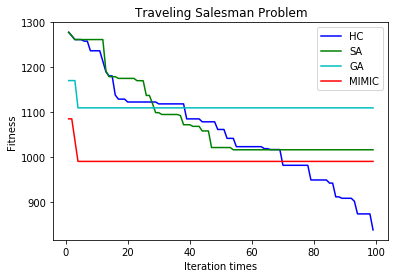

In [10]:
plt.title('Traveling Salesman Problem')
x = range(1,100,1)
plt.plot(x,p1fHC,color='b', label='HC')
plt.plot(x,p1fSA,color='g', label='SA')
plt.plot(x,p1fGA,color='c', label='GA')
plt.plot(x,p1fMIMIC,color='R', label='MIMIC')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Fitness')
plt.show()

In [3]:
fitness2 = mlrose.FlipFlop()

In [4]:
state = np.random.randint(0,2,size=60)

In [5]:
state

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [6]:
state2 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]

In [7]:
problem2 = mlrose.DiscreteOpt(length = 60, fitness_fn = fitness2, maximize = False, max_val = 2)

In [8]:
best_fitness2_HC = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state2, best_fitness2 = mlrose.random_hill_climb(problem2, init_state=state2,max_iters=i)
    best_fitness2_HC += [best_fitness2]

In [9]:
best_fitness2_SA = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state2, best_fitness2 = mlrose.simulated_annealing(problem2,mlrose.GeomDecay(), max_attempts=0, max_iters=i, init_state=state2 )
    best_fitness2_SA += [best_fitness2]

In [10]:
best_fitness2_GA = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state2, best_fitness2 = mlrose.genetic_alg(problem2, pop_size=50, mutation_prob=0.5, max_attempts=10, max_iters=i )
    best_fitness2_GA += [best_fitness2]

In [11]:
best_fitness2_MIMIC = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state2, best_fitness2 = mlrose.mimic(problem2,pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=i)
    best_fitness2_MIMIC += [best_fitness2]

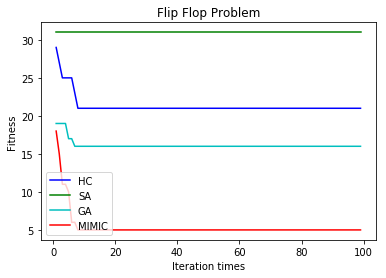

In [12]:
plt.title('Flip Flop Problem')
x = range(1,100,1)
plt.plot(x,best_fitness2_HC,color='b', label='HC')
plt.plot(x,best_fitness2_SA,color='g', label='SA')
plt.plot(x,best_fitness2_GA,color='c', label='GA')
plt.plot(x,best_fitness2_MIMIC,color='R', label='MIMIC')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Fitness')
plt.show()

In [242]:
weights = [ 70,
 73,
 77,
 80,
 82,
 87,
 90,
 94,
 98,
106,
110,
113,
115,
118,
120]

In [243]:
values = [135,
139,
149,
150,
156,
163,
173,
184,
192,
201,
210,
214,
221,
229,
240 ]


In [227]:
type(state3[1])

int

In [258]:
state3 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [259]:
len(state3)

15

In [266]:
fitness3 = mlrose.Knapsack(weights, values, max_weight_pct=1)

In [277]:
fitness3

In [281]:
problem3 = mlrose.DiscreteOpt(length = 15, fitness_fn = fitness3, maximize = True, max_val = 3)

In [306]:
best_fitness3_HC = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state3, best_fitness3 = mlrose.random_hill_climb(problem3)
    #print(best_state3)
    #print(best_fitness3)
    best_fitness3_HC += [best_fitness3]

In [303]:
best_fitness3_SA = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state3, best_fitness3 = mlrose.simulated_annealing(problem3,mlrose.GeomDecay(), max_attempts=10, max_iters=5000 )
    #print(best_state3)
    #print(best_fitness3)
    best_fitness3_SA += [best_fitness3]

In [313]:
best_fitness3_GA = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state3, best_fitness3 = mlrose.genetic_alg(problem3,pop_size=20, mutation_prob=0.1, max_attempts=10, max_iters=3 )
    #print(best_state3)
    #print(best_fitness3)
    best_fitness3_GA += [best_fitness3]

In [293]:
best_fitness3_MIMIC = []
for i in range(1,100,1):
    np.random.seed(4)
    best_state3, best_fitness3 = mlrose.mimic(problem3,pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=i)
    #print(best_state3)
    #print(best_fitness3)
    best_fitness3_MIMIC += [best_fitness3]

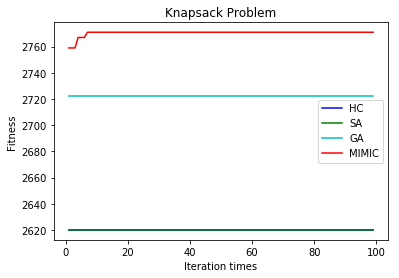

In [318]:
plt.title('Knapsack Problem')
x = range(1,100,1)
plt.plot(x,best_fitness3_HC,color='b', label='HC')
plt.plot(x,best_fitness3_SA,color='g', label='SA')
plt.plot(x,best_fitness3_GA,color='c', label='GA')
plt.plot(x,best_fitness3_MIMIC,color='R', label='MIMIC')
plt.legend()
plt.xlabel('Iteration times')
plt.ylabel('Fitness')
plt.show()

NameError: name 'best_fitness3_HC' is not defined